In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

Load all data into numpy array

In [2]:
def load_runs(results_path,n_runs):
    losses = []
    train_accs = []
    dev_accs = []
    test_accs = []
    for run in range(n_runs):
        fn = results_path + str(run) + '.json'
        with open(fn,'r') as f:
            results = json.load(f)
        losses.append(results['loss_data'])
        train_accs.append(results['train_accs'])
        dev_accs.append(results['dev_accs'])
        test_accs.append(results['test_accs'])
    losses = np.array(losses)
    train_accs = np.array(train_accs)
    dev_accs = np.array(dev_accs)
    test_accs = np.array(test_accs)
    return losses, train_accs, dev_accs, test_accs

In [3]:
n_runs = 100

In [4]:
results_path = 'C:/Users/Monneer/Documents/Scriptie/results/transformer/addjump_scan'
addjump_scan_losses, addjump_scan_train, addjump_scan_dev, addjump_scan_test = load_runs(results_path,n_runs)

In [5]:
results_path = 'C:/Users/Monneer/Documents/Scriptie/results/transformer/addjump_nacs'
addjump_nacs_losses, addjump_nacs_train, addjump_nacs_dev, addjump_nacs_test = load_runs(results_path,n_runs)

In [6]:
results_path = 'C:/Users/Monneer/Documents/Scriptie/results/transformer/addx_scan'
addx_scan_losses, addx_scan_train, addx_scan_dev, addx_scan_test = load_runs(results_path,n_runs)

In [7]:
results_path = 'C:/Users/Monneer/Documents/Scriptie/results/transformer/addx_nacs'
addx_nacs_losses, addx_nacs_train, addx_nacs_dev, addx_nacs_test = load_runs(results_path,n_runs)

In [8]:
results_path = 'C:/Users/Monneer/Documents/Scriptie/results/transformer/churny_scan'
churny_scan_losses, churny_scan_train, churny_scan_dev, churny_scan_test = load_runs(results_path,n_runs)

In [9]:
results_path = 'C:/Users/Monneer/Documents/Scriptie/results/transformer/churny_nacs'
churny_nacs_losses, churny_nacs_train, churny_nacs_dev, churny_nacs_test = load_runs(results_path,n_runs)

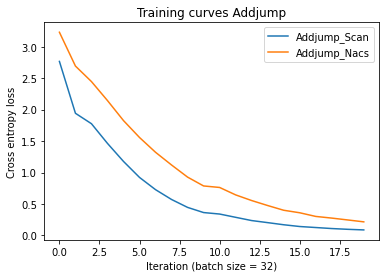

In [10]:
addjump_scan_losses_ave = np.mean(addjump_scan_losses,axis=0)
addjump_nacs_losses_ave = np.mean(addjump_nacs_losses,axis=0)
plt.plot(addjump_scan_losses_ave)
plt.plot(addjump_nacs_losses_ave)
plt.xlabel('Iteration (batch size = 32)')
plt.ylabel('Cross entropy loss')
plt.title('Training curves Addjump')
plt.legend(['Addjump_Scan','Addjump_Nacs'])
plt.show()

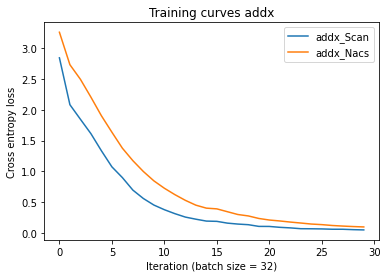

In [11]:
addx_scan_losses_ave = np.mean(addx_scan_losses,axis=0)
addx_nacs_losses_ave = np.mean(addx_nacs_losses,axis=0)
plt.plot(addx_scan_losses_ave)
plt.plot(addx_nacs_losses_ave)
plt.xlabel('Iteration (batch size = 32)')
plt.ylabel('Cross entropy loss')
plt.title('Training curves addx')
plt.legend(['addx_Scan','addx_Nacs'])
plt.show()

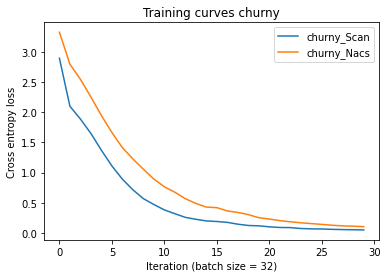

In [12]:
churny_scan_losses_ave = np.mean(churny_scan_losses,axis=0)
churny_nacs_losses_ave = np.mean(churny_nacs_losses,axis=0)
plt.plot(churny_scan_losses_ave)
plt.plot(churny_nacs_losses_ave)
plt.xlabel('Iteration (batch size = 32)')
plt.ylabel('Cross entropy loss')
plt.title('Training curves churny')
plt.legend(['churny_Scan','churny_Nacs'])
plt.show()

In [13]:
addjump_scan_train_ave = np.mean([np.max(addjump_scan_train[i,:]) for i in range(n_runs)])
addjump_nacs_train_ave = np.mean([np.max(addjump_nacs_train[i,:]) for i in range(n_runs)])
addjump_scan_dev_ave = np.mean([np.max(addjump_scan_dev[i,:]) for i in range(n_runs)])
addjump_nacs_dev_ave = np.mean([np.max(addjump_nacs_dev[i,:]) for i in range(n_runs)])
addjump_scan_test_ave = np.mean([np.max(addjump_scan_test[i,:]) for i in range(n_runs)])
addjump_nacs_test_ave = np.mean([np.max(addjump_nacs_test[i,:]) for i in range(n_runs)])

In [14]:
addjump_scan_train_std = np.std([np.max(addjump_scan_train[i,:]) for i in range(n_runs)])
addjump_nacs_train_std = np.std([np.max(addjump_nacs_train[i,:]) for i in range(n_runs)])
addjump_scan_dev_std = np.std([np.max(addjump_scan_dev[i,:]) for i in range(n_runs)])
addjump_nacs_dev_std = np.std([np.max(addjump_nacs_dev[i,:]) for i in range(n_runs)])
addjump_scan_test_std = np.std([np.max(addjump_scan_test[i,:]) for i in range(n_runs)])
addjump_nacs_test_std = np.std([np.max(addjump_nacs_test[i,:]) for i in range(n_runs)])
train_std = [addjump_scan_train_std, addjump_nacs_train_std]
dev_std = [addjump_scan_dev_std, addjump_nacs_dev_std]
test_std = [addjump_scan_test_std, addjump_nacs_test_std]

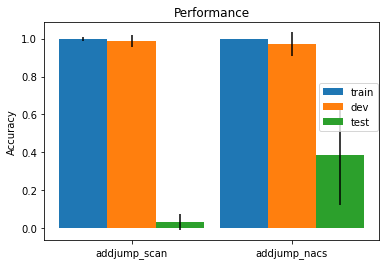

In [15]:
c = np.array([0,1])
w = 0.3

plt.bar(c-w,[addjump_scan_train_ave,addjump_nacs_train_ave],yerr=train_std,width=w)
plt.bar(c,[addjump_scan_dev_ave,addjump_nacs_dev_ave],yerr=dev_std,width=w)
plt.bar(c+w,[addjump_scan_test_ave,addjump_nacs_test_ave],yerr=test_std,width=w)
plt.xticks(c,['addjump_scan','addjump_nacs'])
plt.ylabel('Accuracy')
plt.title('Performance')
plt.legend(['train','dev','test'],loc=[0.82,0.5])
plt.show()

In [16]:
addx_scan_train_ave = np.mean([np.max(addx_scan_train[i,:]) for i in range(n_runs)])
addx_nacs_train_ave = np.mean([np.max(addx_nacs_train[i,:]) for i in range(n_runs)])
addx_scan_dev_ave = np.mean([np.max(addx_scan_dev[i,:]) for i in range(n_runs)])
addx_nacs_dev_ave = np.mean([np.max(addx_nacs_dev[i,:]) for i in range(n_runs)])
addx_scan_test_ave = np.mean([np.max(addx_scan_test[i,:]) for i in range(n_runs)])
addx_nacs_test_ave = np.mean([np.max(addx_nacs_test[i,:]) for i in range(n_runs)])

In [17]:
addx_scan_train_std = np.std([np.max(addx_scan_train[i,:]) for i in range(n_runs)])
addx_nacs_train_std = np.std([np.max(addx_nacs_train[i,:]) for i in range(n_runs)])
addx_scan_dev_std = np.std([np.max(addx_scan_dev[i,:]) for i in range(n_runs)])
addx_nacs_dev_std = np.std([np.max(addx_nacs_dev[i,:]) for i in range(n_runs)])
addx_scan_test_std = np.std([np.max(addx_scan_test[i,:]) for i in range(n_runs)])
addx_nacs_test_std = np.std([np.max(addx_nacs_test[i,:]) for i in range(n_runs)])
train_std = [addx_scan_train_std, addx_nacs_train_std]
dev_std = [addx_scan_dev_std, addx_nacs_dev_std]
test_std = [addx_scan_test_std, addx_nacs_test_std]

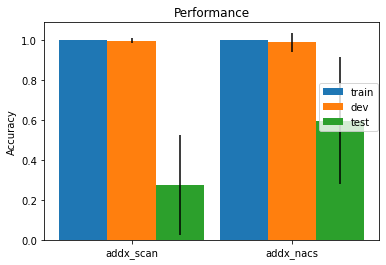

In [18]:
c = np.array([0,1])
w = 0.3

plt.bar(c-w,[addx_scan_train_ave,addx_nacs_train_ave],yerr=train_std,width=w)
plt.bar(c,[addx_scan_dev_ave,addx_nacs_dev_ave],yerr=dev_std,width=w)
plt.bar(c+w,[addx_scan_test_ave,addx_nacs_test_ave],yerr=test_std,width=w)
plt.xticks(c,['addx_scan','addx_nacs'])
plt.ylabel('Accuracy')
plt.title('Performance')
plt.legend(['train','dev','test'],loc=[0.82,0.5])
plt.show()

In [19]:
print(np.mean([np.max(addjump_scan_test[i,:]) for i in range(n_runs)]))
print(np.mean([np.max(addjump_nacs_test[i,:]) for i in range(n_runs)]))
print(np.mean([np.max(addx_scan_test[i,:]) for i in range(n_runs)]))
print(np.mean([np.max(addx_nacs_test[i,:]) for i in range(n_runs)]))

0.03333765896703867
0.38443939787178827
0.27570364238410594
0.5979221854304635


In [20]:
print(addjump_scan_test_std)
print(addjump_nacs_test_std)
print(addx_scan_test_std)
print(addx_nacs_test_std)

0.04343715796735009
0.26240205343635725
0.24967637750134425
0.31674743406170114


In [21]:
churny_scan_train_ave = np.mean([np.max(churny_scan_train[i,:]) for i in range(n_runs)])
churny_nacs_train_ave = np.mean([np.max(churny_nacs_train[i,:]) for i in range(n_runs)])
churny_scan_dev_ave = np.mean([np.max(churny_scan_dev[i,:]) for i in range(n_runs)])
churny_nacs_dev_ave = np.mean([np.max(churny_nacs_dev[i,:]) for i in range(n_runs)])
churny_scan_test_ave = np.mean([np.max(churny_scan_test[i,:]) for i in range(n_runs)])
churny_nacs_test_ave = np.mean([np.max(churny_nacs_test[i,:]) for i in range(n_runs)])

In [22]:
churny_scan_train_std = np.std([np.max(churny_scan_train[i,:]) for i in range(n_runs)])
churny_nacs_train_std = np.std([np.max(churny_nacs_train[i,:]) for i in range(n_runs)])
churny_scan_dev_std = np.std([np.max(churny_scan_dev[i,:]) for i in range(n_runs)])
churny_nacs_dev_std = np.std([np.max(churny_nacs_dev[i,:]) for i in range(n_runs)])
churny_scan_test_std = np.std([np.max(churny_scan_test[i,:]) for i in range(n_runs)])
churny_nacs_test_std = np.std([np.max(churny_nacs_test[i,:]) for i in range(n_runs)])
train_std = [churny_scan_train_std, churny_nacs_train_std]
dev_std = [churny_scan_dev_std, churny_nacs_dev_std]
test_std = [churny_scan_test_std, churny_nacs_test_std]

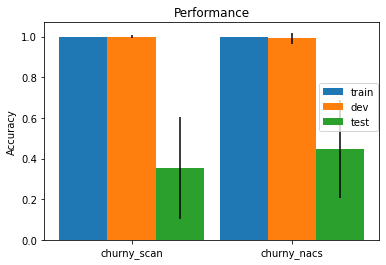

In [23]:
c = np.array([0,1])
w = 0.3

plt.bar(c-w,[churny_scan_train_ave,churny_nacs_train_ave],yerr=train_std,width=w)
plt.bar(c,[churny_scan_dev_ave,churny_nacs_dev_ave],yerr=dev_std,width=w)
plt.bar(c+w,[churny_scan_test_ave,churny_nacs_test_ave],yerr=test_std,width=w)
plt.xticks(c,['churny_scan','churny_nacs'])
plt.ylabel('Accuracy')
plt.title('Performance')
plt.legend(['train','dev','test'],loc=[0.82,0.5])
plt.show()

In [24]:
print(np.mean([np.max(churny_scan_test[i,:]) for i in range(n_runs)]))
print(np.mean([np.max(churny_nacs_test[i,:]) for i in range(n_runs)]))
print(churny_scan_test_std)
print(churny_nacs_test_std)

0.3521192052980133
0.44777317880794704
0.2514480594383754
0.24080014826087717
